# Types of Stationary Series

  - Strict Stationary – Satisfies the mathematical definition of a stationary process. Mean, variance & covariance are not a function of time.

  - Seasonal Stationary – Series exhibiting seasonality.
  
  - Trend Stationary – Series exhibiting trend.

# Methods to check stationarity

## Visualization

  - The most basic methods for stationarity detection rely on plotting the data and visually checking for trend and seasonal components. Trying to determine whether a stationary process generated a time series just by looking at its plot is a dubious task. However, there are some basic properties of non-stationary data that we can look for.

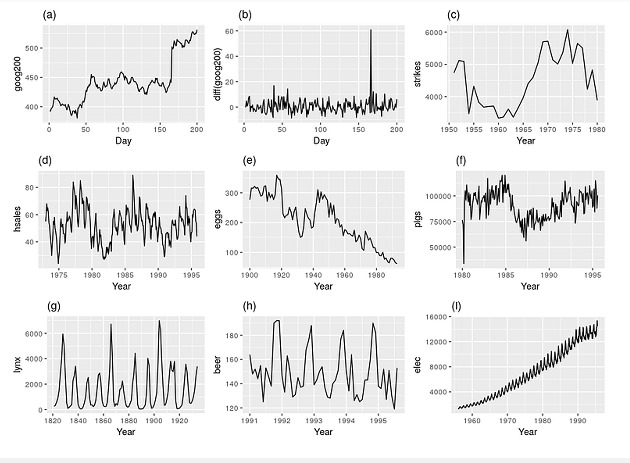

  - Seasonality can be observed in series (d), (h), and (i)

  - The trend can be observed in series (a), (c), (e), (f), and (i)

  - Series (b) and (g) are stationary

# Statistical Tests

Two statistical tests which we will be discussing are:

  - Augmented Dickey-Fuller (ADF) Test
  - Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

## Augmented Dickey-Fuller Test (ADF Test)

  - Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be rejected. The result must be interpreted for a given problem to be meaningful. However, they provide a quick check and confirmatory evidence that the time series is stationary or non-stationary.

  - The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

  - In probability theory and statistics, a unit root is a feature of some stochastic processes (such as random walks) that can cause problems in statistical inference involving time series models. In simple terms, the unit root is non-stationary but does not always have a trend component.



  - ADF test is conducted with the following assumptions:

  - Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
  - Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.


  - Conditions to Reject Null Hypothesis(HO):

    - If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = sm.datasets.sunspots.load_pandas().data
print(df.head())

# Check the dimensionality of the dataset
print(df.shape, df.head())
print("Dataset has {} records and {} columns".format(df.shape[0], df.shape[1]))

     YEAR  SUNACTIVITY
0  1700.0          5.0
1  1701.0         11.0
2  1702.0         16.0
3  1703.0         23.0
4  1704.0         36.0
(309, 2)      YEAR  SUNACTIVITY
0  1700.0          5.0
1  1701.0         11.0
2  1702.0         16.0
3  1703.0         23.0
4  1704.0         36.0
Dataset has 309 records and 2 columns


In [3]:
df.columns

Index(['YEAR', 'SUNACTIVITY'], dtype='object')

In [4]:
# Changing the YEAR data type and setting it as index
df['YEAR'] = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
df.index = df['YEAR']
print(df.index)
print(df.columns)

# Check the data type
del df['YEAR']

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', name='YEAR', length=309, freq=None)
Index(['YEAR', 'SUNACTIVITY'], dtype='object')


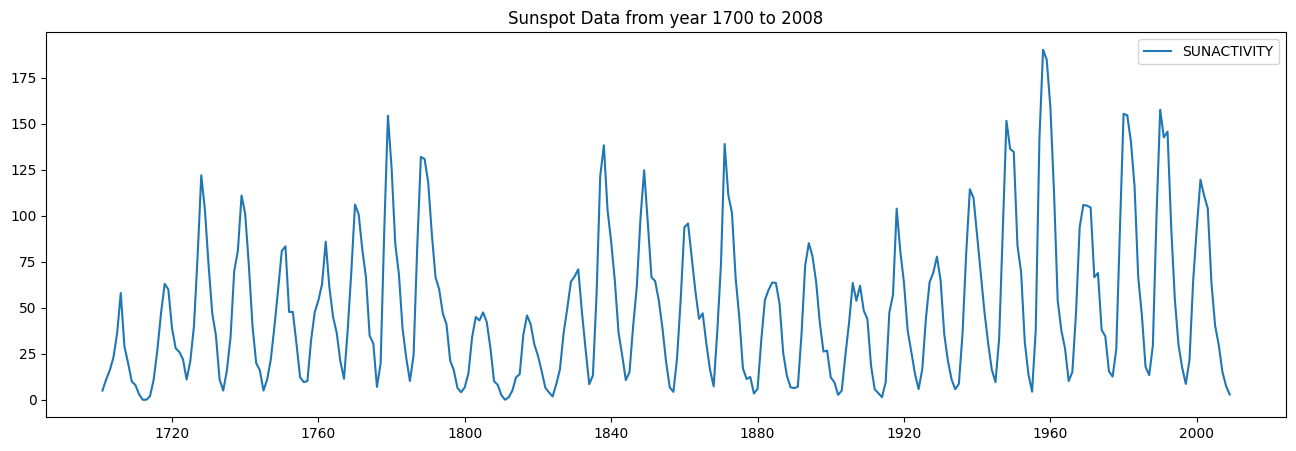

In [5]:
# Plotting the Data
# Define the plot size
plt.figure(figsize=(16, 5))

# Plot the data
plt.plot(df.index, df['SUNACTIVITY'], label='SUNACTIVITY')
plt.legend(loc='best')
plt.title('Sunspot Data from year 1700 to 2008')
plt.show()

In [7]:
df['SUNACTIVITY']

YEAR
1700-12-31     5.0
1701-12-31    11.0
1702-12-31    16.0
1703-12-31    23.0
1704-12-31    36.0
              ... 
2004-12-31    40.4
2005-12-31    29.8
2006-12-31    15.2
2007-12-31     7.5
2008-12-31     2.9
Name: SUNACTIVITY, Length: 309, dtype: float64

In [15]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


# Call the function and run the test
adf_test(df['SUNACTIVITY'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


If the p-value obtained is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


  - The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend. In other words, the test is somewhat similar in spirit to the ADF test. A common misconception, however, is that it can be used interchangeably with the ADF test. This can lead to misinterpretations about stationarity, which can easily go undetected, causing more problems down the line.

  - A key difference from the ADF test is the null hypothesis of the KPSS test is that the series is stationary. So practically, the interpretation of p-value is just the opposite of each other. That is, if the p-value is < significance level (say 0.05), then the series is non-stationary. Whereas in the ADF test, it would mean the tested series is stationary.


  - The KPSS test is conducted with the following assumptions.

    - Null Hypothesis (HO): Series is trend stationary or series has no unit root.
    - Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.
Note: The hypothesis is reversed in the KPSS test compared to ADF Test.

    - If the null hypothesis is failed to be rejected, this test may provide evidence that the series is trend stationary.

  - Conditions to Fail to Reject Null Hypothesis(HO)

    - If the Test Statistic < Critical Value and p-value < 0.05 Fail to Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is trend stationary.

In [16]:
from statsmodels.tsa.stattools import kpss

# Function to print out results in customised manner
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [18]:
kpss_test(df['SUNACTIVITY'])

Results of KPSS Test:
Test Statistic           0.669866
p-value                  0.016285
#Lags Used               7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


The output of the KPSS test contains 4 things:

  - The KPSS statistic
  - p-value
  - Number of lags used by the test
  - Critical values

- The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

- The KPSS statistic is the actual test statistic that is computed while performing the test.

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is, in fact, higher than the target critical value, then that should automatically reflect in a low p-value. That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

  - Finally, the number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test. By default, the statsmodels kpss() uses the ‘legacy’ method. In legacy method, int(12 * (n / 100)**(1 / 4)) a number of lags are included, where n is the length of the series.


  - Test Statistic is 0.669866
  - Critical Value (5%) is 0.463000
  - p-value is 0.016285

Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.
Hence we conclude series is non-stationary

# When to Choose ADF or KPSS Test?

There could be a lot of confusion on when one should use the ADF test or KPSS test and which test would give a correct result. A better solution is to apply/run both tests and makes sure that the series is truly stationary.

The following are the possible outcomes of applying both tests.

  - $Case$ $1:$ Both tests conclude that the given series is stationary – The series is stationary

  - $Case$ $2:$ Both tests conclude that the given series is non-stationary – The series is non-stationary

  - $Case$ $3:$ ADF concludes non-stationary, and KPSS concludes stationary – The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.

  - $Case$ $4:$ ADF concludes stationary, and KPSS concludes non-stationary – The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

# Conclusion

  - Stationarity is an important property of time series data that indicates that the statistical properties of the data do not change over time. It is essential for various time series analysis techniques, including forecasting and modeling. Two tests for checking the stationarity of a time series are used, namely the ADF test and the KPSS test. The article provides step-by-step instructions on how to perform each of these tests in Python.

  - $Detrending$ is carried out by using $differencing$ techniques